In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rank_matrix(matrix):
    return np.linalg.matrix_rank(matrix)

def cost_per_item(X,Y):
    return np.linalg.pinv(X)@Y


In [3]:
#for reading excel file 
df=pd.read_excel(r"D:\SEM4\ML\LabAssignment\Datasets\Lab Session Data.xlsx",sheet_name="Purchase data")
#feature matrix
X=df[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]].values
#output values
Y=df["Payment (Rs)"].values
# rank of feature matrix
rank_X=rank_matrix(X)
print("rank of matrix :" ,rank_X)
#cost per item
cost=cost_per_item(X,Y)
print(cost)

rank of matrix : 3
[ 1. 55. 18.]


In [4]:
#q3
#excel file
df_irctc=pd.read_excel(r"D:\SEM4\ML\LabAssignment\Datasets\Lab Session Data.xlsx",sheet_name="IRCTC Stock Price")
#inbuilt function for mean and variance
def mean_fun(X):
    return np.mean(X)

def var_fun(X):
    return np.var(X)

In [5]:
#hardcoding mean and variance functions
def user_mean(X):
    sum=0
    for i in X:
        sum=sum+i
    m=sum/len(X)
    return m

def user_variance(X):
    mean=user_mean(X)
    #making a list of deviations
    dev=[]
    for i in X:
        dev.append((i-mean)**2)
    var=sum(dev)/len(X)
    return var


In [6]:
#mean and variance of the Price data present in column D
pricedata=df_irctc[["Price"]].values
print("mean of price data",mean_fun(pricedata))

mean of price data 1560.6634538152612


In [19]:
#comparing mean and variance by user defined and inbuilt functions
mean_in=mean_fun(pricedata)
mean_us=user_mean(pricedata)
print(mean_in)
print(mean_us)
if(round(mean_us[0],4)==round(mean_in,4)):
    print("yes means are same")
else:
    print("not same")

var_in=var_fun(pricedata)
var_us=user_variance(pricedata)
if(round(var_us[0],4)==round(var_in,4)):
    print("yes variance are same")
else:
    print("not same")
print(var_in)
print(var_us)



1560.6634538152612
[1560.66345382]
yes means are same
yes variance are same
58496.49239931613
[58496.49239932]


In [8]:
#calculating sample mean by prices from wednesday
Days=df_irctc["Day"]
#calculating price data from wednesday as day 
sample=[]
for i,j in zip(Days,pricedata):
    if(i=="Wed"):
        sample.append(j)
sample_mean=mean_fun(sample)
print("sample mean is :",sample_mean)
print("population mean is :",mean_in)
if(round(mean_in,4)==round(sample_mean,4)):
    print("They are same")
else:
    print("not same")


sample mean is : 1550.7060000000001
population mean is : 1560.6634538152612
not same


In [9]:
#calculating sample mean by prices from month April
mon=df_irctc["Month"].values
#calculating price data from  April
sample=[]
for i,j in zip(mon,pricedata):
    if(i=="Apr"):
        sample.append(j)
sample_mean=mean_fun(sample)
print("sample mean is :",sample_mean)
print("population mean is :",mean_in)
if(round(mean_in,4)==round(sample_mean,4)):
    print("They are same")
else:
    print("not same")


sample mean is : 1698.9526315789474
population mean is : 1560.6634538152612
not same


In [10]:
#function to calculate loss 
def calculate_loss(sales,days):
    n=len(days)
    pd.Series(days).squeeze()
    days_of_loss=sales.apply(lambda x:x<0).sum()
    return days_of_loss/n

In [11]:
#function to calculate profit probability on wednesdays
def calculate_prob_wed(salesonwed,days):
    profitdays=0
    for i,j in zip(days,salesonwed):
        if i=="Wed" and j>0:
            profitdays=profitdays+1
    return profitdays/len(days)

In [12]:
#function to find conditional probability on wednesday
def conditional(sales,days):
    pd.Series(days)
    pd.Series(sales)
    wed_days=days.apply(lambda x:x=="Wed").sum()
    profitable_days=sales.apply(lambda x:x>0).sum()
    return profitable_days/wed_days

In [13]:
#function to make a scatter plot of Chg% data against the day of the week 
def plot(chg,days):
    plt.scatter(chg,days)
    plt.xlabel("days of week")
    plt.ylabel("change percentage")
    plt.show()

loss percentage = 0.4979919678714859
probability of profit on wednesday = 0.08433734939759036
Conditional Probability 2.48


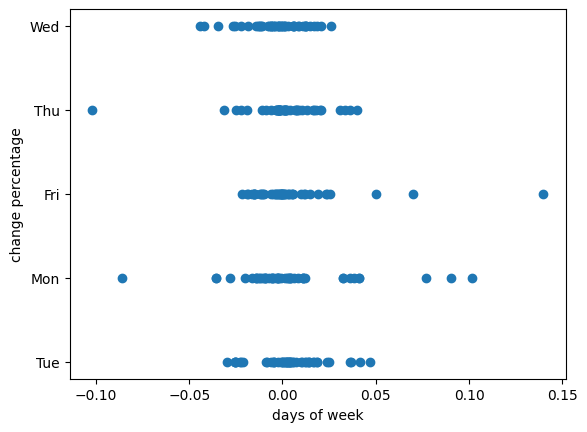

In [14]:
#find the probability of making a loss over the stock
change=df_irctc["Chg%"]
print("loss percentage =",calculate_loss(change,Days))
#finding probability of making a profit on Wednesday 
print("probability of profit on wednesday =",calculate_prob_wed(change,Days))
#conditional probability of making profit, given that today is Wednesday
print("Conditional Probability",conditional(change,Days))
#scatter plot of change v/s data
plot(change,Days)

In [15]:
##q5 similarity matrix
#similarity calculation from 

In [16]:

df1=pd.read_excel(r"D:\SEM4\ML\LabAssignment\Datasets\Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
age=df1["age"].values
print("mean :",mean_fun(age))
print("variance:",var_fun(age))

mean : 73.55582206716092
variance: 1401648.034062266


In [17]:
TSH = df1["TSH"].replace('?',0).values
print("mean :",mean_fun(TSH))
print("variance:",var_fun(TSH))


mean : 4.739347463911906
variance: 533.3814201665515


C:\Users\Amishi Singh\AppData\Local\Temp\ipykernel_14016\1891206835.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TSH = df1["TSH"].replace('?',0).values


In [18]:
med=np.median(TSH)
TSH=df1["TSH"].replace('?',med)
print("mean :",mean_fun(TSH))
print("variance:",var_fun(TSH))

mean : 4.849508824574793
variance: 532.4572923434067


C:\Users\Amishi Singh\AppData\Local\Temp\ipykernel_14016\1041356738.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TSH=df1["TSH"].replace('?',med)
